<a href="https://colab.research.google.com/github/CamiloVga/Curso-IA-Aplicada/blob/main/Script_Clase18_FundamentosNLP_y_Embedings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Inteligencia Artificial Aplicada para la Economía
## Universidad de los Andes

### 👨‍🏫 Profesores
- **Profesor Magistral:** Camilo Vega Barbosa
- **Asistente de Docencia:** Sergio Julian Zona Moreno

### 📚 Fundamentos NLP: Similitud Semántica entre Productos y Categorías
Este notebook demuestra la implementación práctica de conceptos fundamentales de Procesamiento de Lenguaje Natural (NLP):

1. **Tokenización ✂️**
   - División del texto en unidades básicas
   - Procesamiento a nivel de palabras
   - Manejo de términos compuestos

2. **Normalización 🧹**
   - Conversión a minúsculas
   - Lematización
   - Eliminación de stopwords y puntuación

3. **Vectorización 🔢**
   - Word Embeddings pre-entrenados
   - Representación vectorial de palabras
   - Espacio semántico multidimensional

4. **Similitud de Coseno 📐**
   - Cálculo matemático paso a paso
   - Implementación optimizada con NumPy
   - Interpretación de resultados
   - Visualización de relaciones semánticas

### 🎯 Objetivo
Identificar relaciones semánticas entre productos de supermercado y sus categorías utilizando:
- Embeddings pre-entrenados de SpaCy
- Cálculo de similitud de coseno
- Clasificación automática basada en similitud semántica

### 🔍 Aplicaciones Prácticas:
- Sistemas de búsqueda semántica en e-commerce
- Categorización automática de productos
- Recomendaciones basadas en similitud
- Análisis de mercado y agrupamiento

### Requisitos Técnicos:
- **Entorno de Ejecución**: Google Colab o Jupyter Notebook
- **Bibliotecas Necesarias**:
  - spaCy (con modelo español: es_core_news_md)
  - NumPy
  - scikit-learn
  - Matplotlib
  - Seaborn
- **Memoria RAM**: Mínimo 4GB recomendados
- **Tiempo Estimado**: 15-20 minutos para ejecución completa



In [1]:
# Instalar las bibliotecas principales
!pip install spacy scikit-learn matplotlib seaborn numpy -q

# Descargar los modelos de lenguaje de spaCy para español y alemán
!python -m spacy download es_core_news_md -q
!python -m spacy download en_core_news_md -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 22.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

✘ No compatible package found for 'en_core_news_md' (spaCy v3.8.4)



🛒 EJERCICIO DE SIMILITUD SEMÁNTICA: PRODUCTOS Y CATEGORÍAS 🛒
Este ejercicio demuestra el proceso completo de NLP:
1. Tokenización ✂️: Dividir el texto en unidades básicas
2. Normalización 🧹: Estandarizar el texto (minúsculas, lematización)
3. Vectorización 🔢: Convertir texto en representaciones numéricas
4. Similitud de coseno 📏: Medir la similitud semántica entre palabras

Cargando modelo de lenguaje...
✓ Modelo español cargado

🧪 DEMOSTRACIÓN: PALABRAS VS FRASES
Comparando similitudes:
  • 'tomate' con 'verdura': 0.7085
  • 'tomate' con 'fruta': 0.6227
  • 'tomate fresco' con 'verdura': 0.6958
  • 'tomate fresco' con 'fruta': 0.6650


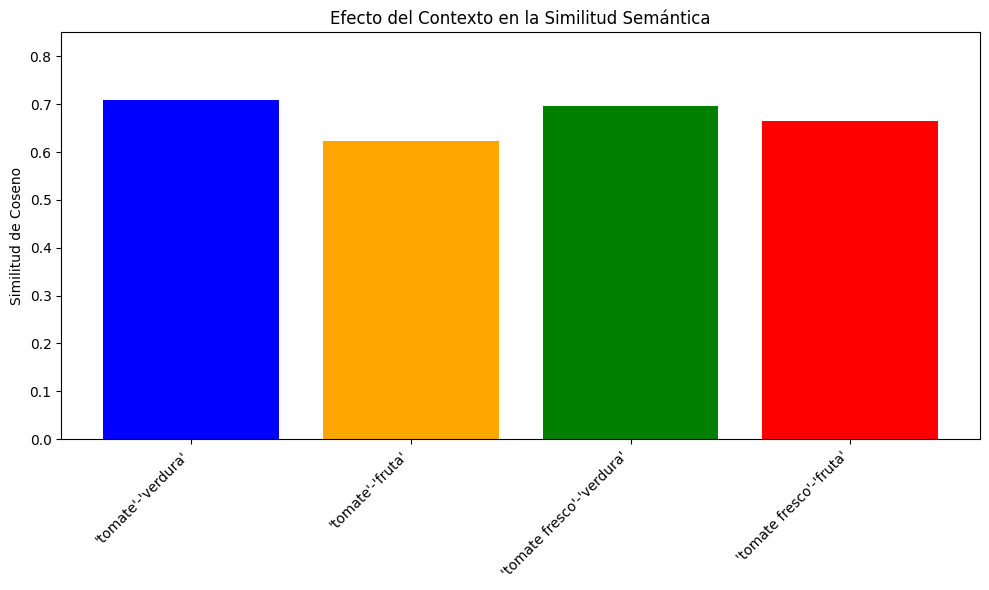


💡 CONCLUSIÓN:
  Este ejemplo muestra cómo SpaCy considera el contexto completo al generar vectores.
  La adición de 'fresco' modifica la representación semántica del tomate,
  posiblemente acercándolo más a la categoría de verdura que de fruta.

🔄 PROCESANDO PRODUCTOS

🔍 Analizando: 'manzana'
  ✂️ Tokenización:
    - Token: 'manzana'
  🧹 Normalización:
    - Original: 'manzana'
    - Minúsculas: 'manzana'
    - Lema: 'manzana'
  🔢 Vectorización:
    - Dimensiones del vector: (300,)
    - Muestra del vector: [-0.58136   0.037496  0.66934   2.7966   -0.023352]...

🔍 Analizando: 'detergente'
  ✂️ Tokenización:
    - Token: 'detergente'
  🧹 Normalización:
    - Original: 'detergente'
    - Minúsculas: 'detergente'
    - Lema: 'detergente'
  🔢 Vectorización:
    - Dimensiones del vector: (300,)
    - Muestra del vector: [ 1.5006    2.2125   -0.29781  -0.048466 -0.17367 ]...

🔍 Analizando: 'pollo'
  ✂️ Tokenización:
    - Token: 'pollo'
  🧹 Normalización:
    - Original: 'pollo'
    - Minús

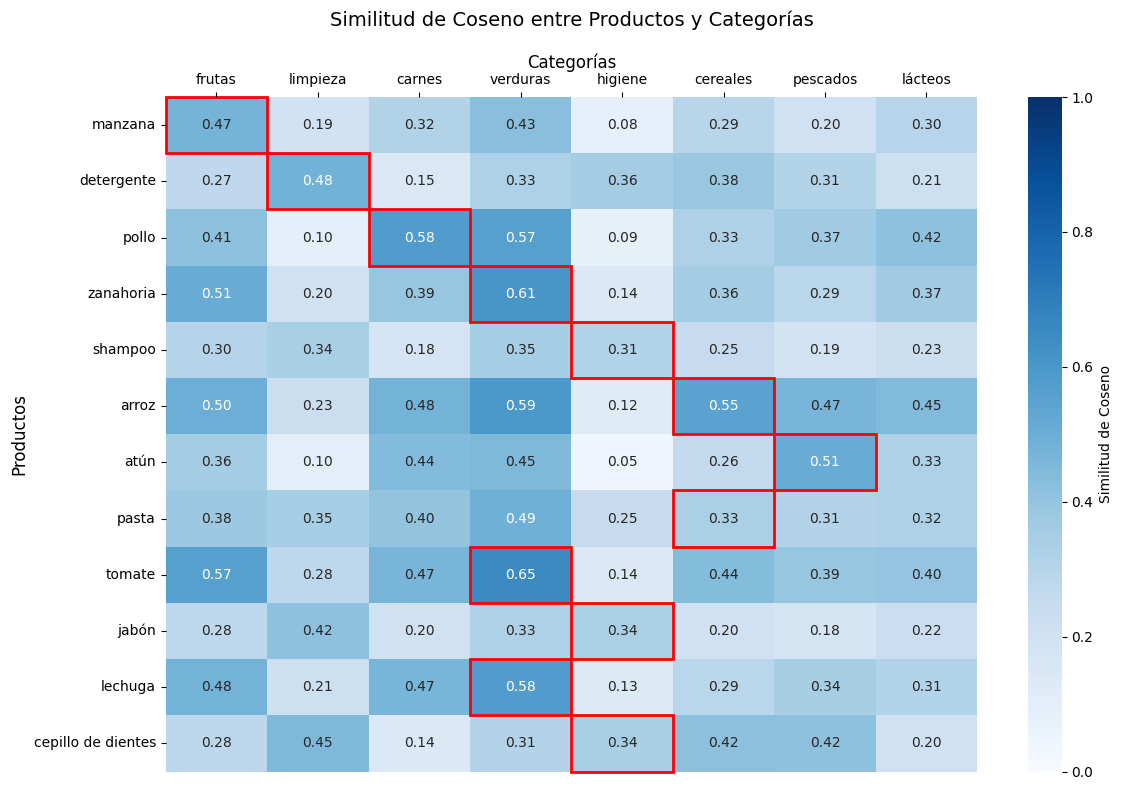


🏆 MEJORES COINCIDENCIAS POR PRODUCTO
  'manzana' → 'frutas' (similitud: 0.4743) ✅ CORRECTO
    Interpretación: Similitud semántica moderada
  'detergente' → 'limpieza' (similitud: 0.4820) ✅ CORRECTO
    Interpretación: Similitud semántica moderada
  'pollo' → 'carnes' (similitud: 0.5788) ✅ CORRECTO
    Interpretación: Similitud semántica moderada
  'zanahoria' → 'verduras' (similitud: 0.6079) ✅ CORRECTO
    Interpretación: Similitud semántica moderada
  'shampoo' → 'verduras' (similitud: 0.3522) ❌ INCORRECTO (debería ser 'higiene')
    Interpretación: Baja similitud semántica
  'arroz' → 'verduras' (similitud: 0.5938) ❌ INCORRECTO (debería ser 'cereales')
    Interpretación: Similitud semántica moderada
  'atún' → 'pescados' (similitud: 0.5106) ✅ CORRECTO
    Interpretación: Similitud semántica moderada
  'pasta' → 'verduras' (similitud: 0.4887) ❌ INCORRECTO (debería ser 'cereales')
    Interpretación: Similitud semántica moderada
  'tomate' → 'verduras' (similitud: 0.6486) ✅ CORRECTO

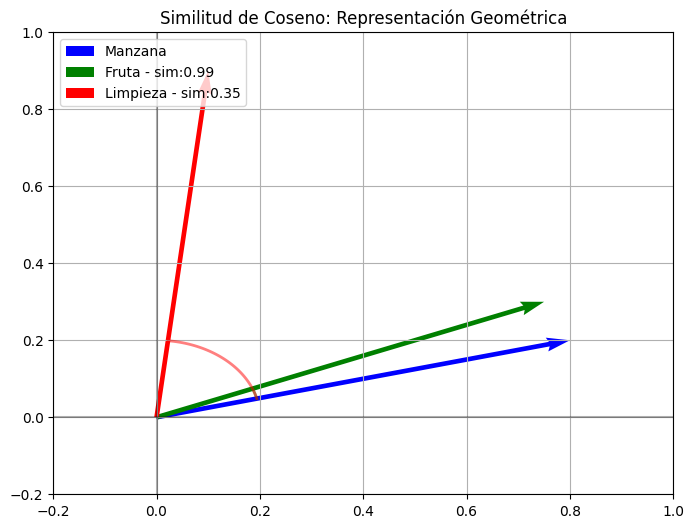


FÓRMULA MATEMÁTICA:
  similitud_coseno(A, B) = (A·B) / (|A| × |B|)
Donde:
  • A·B es el producto punto de los vectores
  • |A| y |B| son las magnitudes (normas) de los vectores

Ejemplo numérico:
  • Producto punto de 'manzana' y 'fruta': 0.6600
  • Magnitud de 'manzana': 0.8246
  • Magnitud de 'fruta': 0.8078
  • Similitud de coseno: 0.9908

💡 CONCLUSIÓN
Este ejercicio muestra cómo los modelos de embeddings pueden identificar
relaciones semánticas entre productos y sus categorías dentro del mismo idioma.
Observaciones importantes:
1. La normalización mejora los resultados de similitud
2. Los embeddings capturan relaciones semánticas incluso cuando no hay similitud léxica
3. El contexto (palabras adicionales) puede modificar significativamente la representación
4. Estos conceptos son fundamentales en aplicaciones como:
   - Sistemas de búsqueda semántica
   - Categorización automática de productos
   - Recomendaciones basadas en similitud
   - Análisis de mercado y agrupamiento


In [2]:
"""
EJERCICIO DE SIMILITUD SEMÁNTICA: PRODUCTOS Y CATEGORÍAS DE SUPERMERCADO 🛒

Este script demuestra el proceso completo de NLP comparando productos de supermercado
con sus posibles categorías, mostrando cómo los embeddings capturan relaciones semánticas
entre palabras del mismo idioma.
"""

# ====================== IMPORTACIÓN DE BIBLIOTECAS ======================
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# ====================== DEFINICIÓN DE FUNCIONES ======================

def procesar_palabra(palabra, nlp, mostrar_detalles=True):
    """
    Realiza el proceso completo de NLP en una palabra:
    1. Tokenización ✂️
    2. Normalización 🧹
    3. Vectorización 🔢
    """
    # PASO 1: TOKENIZACIÓN ✂️
    # Procesamos la palabra con SpaCy
    doc = nlp(palabra.lower())  # Convertimos a minúsculas para mejorar resultados

    if mostrar_detalles:
        print(f"\n🔍 Analizando: '{palabra}'")

        # Mostramos los tokens
        print(f"  ✂️ Tokenización:")
        for token in doc:
            print(f"    - Token: '{token.text}'")

        # PASO 2: NORMALIZACIÓN 🧹
        print(f"  🧹 Normalización:")
        for token in doc:
            print(f"    - Original: '{token.text}'")
            print(f"    - Minúsculas: '{token.text.lower()}'")
            print(f"    - Lema: '{token.lemma_}'")

        # PASO 3: VECTORIZACIÓN 🔢
        print(f"  🔢 Vectorización:")
        print(f"    - Dimensiones del vector: {doc.vector.shape}")

        # Mostramos una pequeña muestra del vector
        print(f"    - Muestra del vector: {doc.vector[:5]}...")

    # Devolvemos el vector y el documento procesado
    return doc.vector, doc

def calcular_similitud_productos_categorias(productos, categorias, clasificacion, nlp):
    """
    Calcula y visualiza la matriz de similitud entre productos y categorías.

    Args:
        productos: Lista de productos
        categorias: Lista de categorías
        clasificacion: Diccionario que asigna cada producto a su categoría correcta
        nlp: Modelo de spaCy cargado
    """
    # Matrices para almacenar vectores y similitudes
    vectores_productos = []
    vectores_categorias = []
    matriz_similitud = np.zeros((len(productos), len(categorias)))

    # Procesamos cada producto
    print("\n🔄 PROCESANDO PRODUCTOS")
    for producto in productos:
        vector, _ = procesar_palabra(producto, nlp, mostrar_detalles=True)
        vectores_productos.append(vector)

    # Procesamos cada categoría
    print("\n🔄 PROCESANDO CATEGORÍAS")
    for categoria in categorias:
        vector, _ = procesar_palabra(categoria, nlp, mostrar_detalles=True)
        vectores_categorias.append(vector)

    # Calculamos la similitud de coseno entre cada producto y categoría
    print("\n📊 CALCULANDO MATRIZ DE SIMILITUD")
    for i, vec_producto in enumerate(vectores_productos):
        for j, vec_categoria in enumerate(vectores_categorias):
            # Preparamos los vectores para calcular similitud de coseno
            vec_producto_reshaped = vec_producto.reshape(1, -1)
            vec_categoria_reshaped = vec_categoria.reshape(1, -1)

            # FÓRMULA DE SIMILITUD DE COSENO: cos(θ) = (A·B)/(|A|·|B|)
            sim = cosine_similarity(vec_producto_reshaped, vec_categoria_reshaped)[0][0]
            matriz_similitud[i, j] = sim

            # Destacamos si es la categoría correcta
            es_categoria_correcta = categorias[j] == clasificacion[productos[i]]
            destacado = "✓" if es_categoria_correcta else ""

            print(f"  Similitud entre '{productos[i]}' y '{categorias[j]}': {sim:.4f} {destacado}")

    # Visualizamos la matriz de similitud
    visualizar_matriz_similitud(productos, categorias, matriz_similitud, clasificacion)

    # Encontramos las mejores coincidencias
    encontrar_mejores_coincidencias(productos, categorias, matriz_similitud, clasificacion)

    return matriz_similitud

def visualizar_matriz_similitud(productos, categorias, matriz_similitud, clasificacion):
    """
    Visualiza la matriz de similitud entre productos y categorías como un mapa de calor.
    """
    plt.figure(figsize=(12, 8))

    # Creamos el mapa de calor con etiquetas arriba
    ax = sns.heatmap(
        matriz_similitud,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=categorias,
        yticklabels=productos,
        vmin=0,
        vmax=1,
        cbar_kws={'label': 'Similitud de Coseno'}
    )

    # Colocamos las etiquetas de columnas (categorías) en la parte superior
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # Añadimos un marcador para las categorías correctas
    # Creamos un diccionario inverso para encontrar índices
    indices_cat = {cat: i for i, cat in enumerate(categorias)}

    for i, producto in enumerate(productos):
        categoria_correcta = clasificacion[producto]
        j = indices_cat[categoria_correcta]

        # Dibujamos un rectángulo alrededor de la categoría correcta
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False,
                                 edgecolor='red', lw=2, clip_on=False))

    plt.title("Similitud de Coseno entre Productos y Categorías", fontsize=14, pad=20)
    plt.xlabel("Categorías", fontsize=12)
    plt.ylabel("Productos", fontsize=12)
    plt.tight_layout()
    plt.show()

def encontrar_mejores_coincidencias(productos, categorias, matriz_similitud, clasificacion):
    """
    Encuentra y muestra las mejores coincidencias entre productos y categorías.
    """
    print("\n🏆 MEJORES COINCIDENCIAS POR PRODUCTO")

    # Contamos cuántas veces acertamos la categoría correcta
    aciertos = 0

    for i, producto in enumerate(productos):
        # Encontramos la categoría con mayor similitud
        mejor_indice = np.argmax(matriz_similitud[i])
        mejor_similitud = matriz_similitud[i, mejor_indice]
        mejor_categoria = categorias[mejor_indice]

        # Verificamos si es la categoría correcta
        categoria_correcta = clasificacion[producto]
        es_correcta = mejor_categoria == categoria_correcta

        if es_correcta:
            aciertos += 1
            resultado = "✅ CORRECTO"
        else:
            resultado = f"❌ INCORRECTO (debería ser '{categoria_correcta}')"

        print(f"  '{producto}' → '{mejor_categoria}' (similitud: {mejor_similitud:.4f}) {resultado}")

        # Interpretamos la similitud
        if mejor_similitud > 0.7:
            interpretacion = "Alta similitud semántica"
        elif mejor_similitud > 0.4:
            interpretacion = "Similitud semántica moderada"
        elif mejor_similitud > 0.2:
            interpretacion = "Baja similitud semántica"
        else:
            interpretacion = "Similitud muy baja o nula"

        print(f"    Interpretación: {interpretacion}")

    # Mostramos la precisión general del modelo
    precision = aciertos / len(productos) * 100
    print(f"\n📈 Precisión del modelo: {precision:.1f}% ({aciertos}/{len(productos)} aciertos)")

def demostrar_frases_vs_palabras(nlp):
    """
    Demuestra cómo los vectores de frases difieren de los vectores de palabras individuales.
    """
    print("\n🧪 DEMOSTRACIÓN: PALABRAS VS FRASES")

    # Definimos nuestras palabras y frases
    palabra = "tomate"
    frase = "tomate fresco"
    categoria1 = "verdura"
    categoria2 = "fruta"

    # Procesamos con SpaCy
    vec_palabra = nlp(palabra.lower()).vector
    vec_frase = nlp(frase.lower()).vector
    vec_cat1 = nlp(categoria1.lower()).vector
    vec_cat2 = nlp(categoria2.lower()).vector

    # Calculamos similitudes
    sim_palabra_cat1 = cosine_similarity(vec_palabra.reshape(1, -1), vec_cat1.reshape(1, -1))[0][0]
    sim_palabra_cat2 = cosine_similarity(vec_palabra.reshape(1, -1), vec_cat2.reshape(1, -1))[0][0]
    sim_frase_cat1 = cosine_similarity(vec_frase.reshape(1, -1), vec_cat1.reshape(1, -1))[0][0]
    sim_frase_cat2 = cosine_similarity(vec_frase.reshape(1, -1), vec_cat2.reshape(1, -1))[0][0]

    print(f"Comparando similitudes:")
    print(f"  • '{palabra}' con '{categoria1}': {sim_palabra_cat1:.4f}")
    print(f"  • '{palabra}' con '{categoria2}': {sim_palabra_cat2:.4f}")
    print(f"  • '{frase}' con '{categoria1}': {sim_frase_cat1:.4f}")
    print(f"  • '{frase}' con '{categoria2}': {sim_frase_cat2:.4f}")

    # Visualizamos las diferencias
    labels = [f"'{palabra}'-'{categoria1}'", f"'{palabra}'-'{categoria2}'",
              f"'{frase}'-'{categoria1}'", f"'{frase}'-'{categoria2}'"]
    valores = [sim_palabra_cat1, sim_palabra_cat2, sim_frase_cat1, sim_frase_cat2]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, valores, color=['blue', 'orange', 'green', 'red'])
    plt.ylim(0, max(valores) * 1.2)
    plt.title("Efecto del Contexto en la Similitud Semántica")
    plt.ylabel("Similitud de Coseno")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("\n💡 CONCLUSIÓN:")
    print("  Este ejemplo muestra cómo SpaCy considera el contexto completo al generar vectores.")
    print("  La adición de 'fresco' modifica la representación semántica del tomate,")
    print("  posiblemente acercándolo más a la categoría de verdura que de fruta.")

def explicar_similitud_coseno():
    """
    Explica el concepto de similitud de coseno con una visualización simple.
    """
    print("\n📐 EXPLICACIÓN: SIMILITUD DE COSENO")
    print("La similitud de coseno mide el ángulo entre dos vectores:")
    print("  • Similitud = 1: Los vectores apuntan en la misma dirección (conceptos idénticos)")
    print("  • Similitud = 0: Los vectores son perpendiculares (conceptos no relacionados)")
    print("  • Similitud = -1: Los vectores apuntan en direcciones opuestas (raramente ocurre)")

    # Crear visualización de tres vectores
    plt.figure(figsize=(8, 6))

    # Definir vectores
    origen = [0, 0]
    vec1 = [0.8, 0.2]  # Manzana
    vec2 = [0.75, 0.3]  # Fruta (similar)
    vec3 = [0.1, 0.9]  # Vector no relacionado (limpieza)

    # Calcular similitudes
    sim_12 = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    sim_13 = np.dot(vec1, vec3) / (np.linalg.norm(vec1) * np.linalg.norm(vec3))

    # Dibujar vectores
    plt.quiver(*origen, *vec1, scale=1, scale_units='xy', angles='xy', color='blue', label=f'Manzana')
    plt.quiver(*origen, *vec2, scale=1, scale_units='xy', angles='xy', color='green', label=f'Fruta - sim:{sim_12:.2f}')
    plt.quiver(*origen, *vec3, scale=1, scale_units='xy', angles='xy', color='red', label=f'Limpieza - sim:{sim_13:.2f}')

    # Configurar gráfico
    plt.xlim(-0.2, 1.0)
    plt.ylim(-0.2, 1.0)
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.legend(loc='upper left')
    plt.title('Similitud de Coseno: Representación Geométrica')

    # Añadir arco para mostrar el ángulo entre vectores
    radio = 0.2
    angulo1 = np.arctan2(vec1[1], vec1[0])
    angulo2 = np.arctan2(vec2[1], vec2[0])
    angulo3 = np.arctan2(vec3[1], vec3[0])

    # Dibujar arcos para mostrar ángulos
    t1 = np.linspace(angulo1, angulo2, 100)
    plt.plot(radio * np.cos(t1), radio * np.sin(t1), 'g-', lw=2, alpha=0.5)
    t2 = np.linspace(angulo1, angulo3, 100)
    plt.plot(radio * np.cos(t2), radio * np.sin(t2), 'r-', lw=2, alpha=0.5)

    plt.show()

    # Explicación matemática
    print("\nFÓRMULA MATEMÁTICA:")
    print("  similitud_coseno(A, B) = (A·B) / (|A| × |B|)")
    print("Donde:")
    print("  • A·B es el producto punto de los vectores")
    print("  • |A| y |B| son las magnitudes (normas) de los vectores")
    print("\nEjemplo numérico:")
    print(f"  • Producto punto de 'manzana' y 'fruta': {vec1[0]*vec2[0] + vec1[1]*vec2[1]:.4f}")
    print(f"  • Magnitud de 'manzana': {np.linalg.norm(vec1):.4f}")
    print(f"  • Magnitud de 'fruta': {np.linalg.norm(vec2):.4f}")
    print(f"  • Similitud de coseno: {sim_12:.4f}")

# ====================== FUNCIÓN PRINCIPAL ======================

def main():
    """Función principal del programa."""
    print("🛒 EJERCICIO DE SIMILITUD SEMÁNTICA: PRODUCTOS Y CATEGORÍAS 🛒")
    print("="*80)
    print("Este ejercicio demuestra el proceso completo de NLP:")
    print("1. Tokenización ✂️: Dividir el texto en unidades básicas")
    print("2. Normalización 🧹: Estandarizar el texto (minúsculas, lematización)")
    print("3. Vectorización 🔢: Convertir texto en representaciones numéricas")
    print("4. Similitud de coseno 📏: Medir la similitud semántica entre palabras")
    print("="*80)

    # Definimos productos y categorías de supermercado
    productos = [
        "manzana", "detergente", "pollo", "zanahoria",
        "shampoo", "arroz", "atún", "pasta", "tomate",
        "jabón", "lechuga", "cepillo de dientes"
    ]

    categorias = [
        "frutas", "limpieza", "carnes", "verduras",
        "higiene", "cereales", "pescados", "lácteos"
    ]

    # Clasificación correcta de productos (para evaluación)
    clasificacion = {
        "manzana": "frutas",
        "detergente": "limpieza",
        "pollo": "carnes",
        "zanahoria": "verduras",
        "shampoo": "higiene",
        "arroz": "cereales",
        "atún": "pescados",
        "pasta": "cereales",
        "tomate": "verduras",
        "jabón": "higiene",
        "lechuga": "verduras",
        "cepillo de dientes": "higiene"
    }

    # Cargamos el modelo de lenguaje de spaCy
    print("\nCargando modelo de lenguaje...")
    try:
        nlp = spacy.load("es_core_news_md")
        print("✓ Modelo español cargado")
    except OSError:
        print("! Modelo español no encontrado. Instalando...")
        import subprocess
        subprocess.call(["python", "-m", "spacy", "download", "es_core_news_md"])
        nlp = spacy.load("es_core_news_md")

    # Demostramos las diferencias entre vectores de palabras y frases
    demostrar_frases_vs_palabras(nlp)

    # Calculamos la similitud entre productos y categorías
    matriz_similitud = calcular_similitud_productos_categorias(
        productos,
        categorias,
        clasificacion,
        nlp
    )

    # Explicamos la similitud de coseno
    explicar_similitud_coseno()

    print("\n💡 CONCLUSIÓN")
    print("Este ejercicio muestra cómo los modelos de embeddings pueden identificar")
    print("relaciones semánticas entre productos y sus categorías dentro del mismo idioma.")
    print("Observaciones importantes:")
    print("1. La normalización mejora los resultados de similitud")
    print("2. Los embeddings capturan relaciones semánticas incluso cuando no hay similitud léxica")
    print("3. El contexto (palabras adicionales) puede modificar significativamente la representación")
    print("4. Estos conceptos son fundamentales en aplicaciones como:")
    print("   - Sistemas de búsqueda semántica")
    print("   - Categorización automática de productos")
    print("   - Recomendaciones basadas en similitud")
    print("   - Análisis de mercado y agrupamiento")

# ====================== EJECUCIÓN DEL PROGRAMA ======================

if __name__ == "__main__":
    main()

🛒 EJERCICIO DE SIMILITUD SEMÁNTICA: PRODUCTOS DE SUPERMERCADO 🛒
Este ejercicio demuestra el proceso completo de NLP:
1. Tokenización ✂️: Dividir el texto en unidades básicas
2. Normalización 🧹: Estandarizar el texto (minúsculas, lematización)
3. Vectorización 🔢: Convertir texto en representaciones numéricas
4. Similitud de coseno 📏: Medir la similitud semántica entre palabras en diferentes idiomas

Cargando modelos de lenguaje...
✓ Modelo español cargado
! Modelo inglés no encontrado. Instalando...

🧪 DEMOSTRACIÓN: IMPORTANCIA DE LA NORMALIZACIÓN
Comparando 'Pan' con 'Bread':
  • Similitud SIN normalización: -0.0277
  • Similitud CON normalización: -0.0395
  • Mejora: -0.0119 (-42.9%)

🔄 PROCESANDO PRODUCTOS EN ESPAÑOL

🔍 Analizando: 'pan'
  ✂️ Tokenización:
    - Token: 'pan'
  🧹 Normalización:
    - Original: 'pan'
    - Minúsculas: 'pan'
    - Lema: 'pan'
  🔢 Vectorización:
    - Dimensiones del vector: (300,)
    - Muestra del vector: [-2.7066   3.2421  -2.7033   5.7346   0.74364].

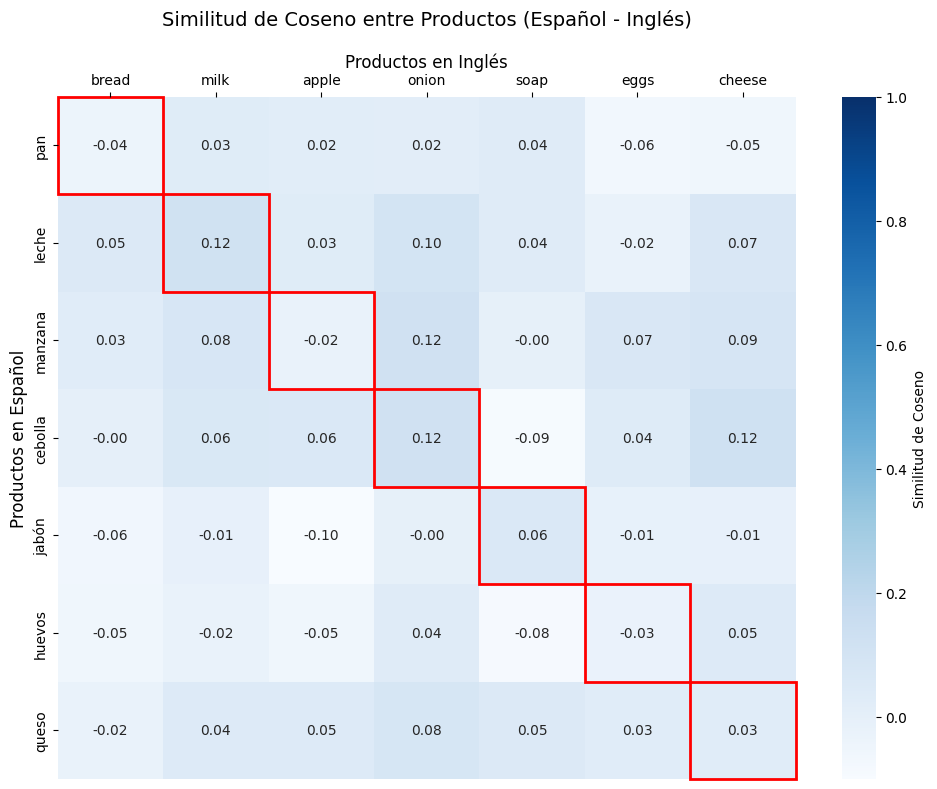


🏆 MEJORES COINCIDENCIAS POR PRODUCTO
  'pan' → 'soap' (similitud: 0.0374) ❌ INCORRECTO (debería ser 'bread')
    Interpretación: Similitud muy baja o nula
  'leche' → 'milk' (similitud: 0.1158) ✅ CORRECTO
    Interpretación: Similitud muy baja o nula
  'manzana' → 'onion' (similitud: 0.1210) ❌ INCORRECTO (debería ser 'apple')
    Interpretación: Similitud muy baja o nula
  'cebolla' → 'cheese' (similitud: 0.1242) ❌ INCORRECTO (debería ser 'onion')
    Interpretación: Similitud muy baja o nula
  'jabón' → 'soap' (similitud: 0.0632) ✅ CORRECTO
    Interpretación: Similitud muy baja o nula
  'huevos' → 'cheese' (similitud: 0.0450) ❌ INCORRECTO (debería ser 'eggs')
    Interpretación: Similitud muy baja o nula
  'queso' → 'onion' (similitud: 0.0807) ❌ INCORRECTO (debería ser 'cheese')
    Interpretación: Similitud muy baja o nula

📈 Precisión del modelo: 28.6% (2/7 aciertos)

📐 EXPLICACIÓN: SIMILITUD DE COSENO
La similitud de coseno mide el ángulo entre dos vectores:
  • Similitud = 1: Lo

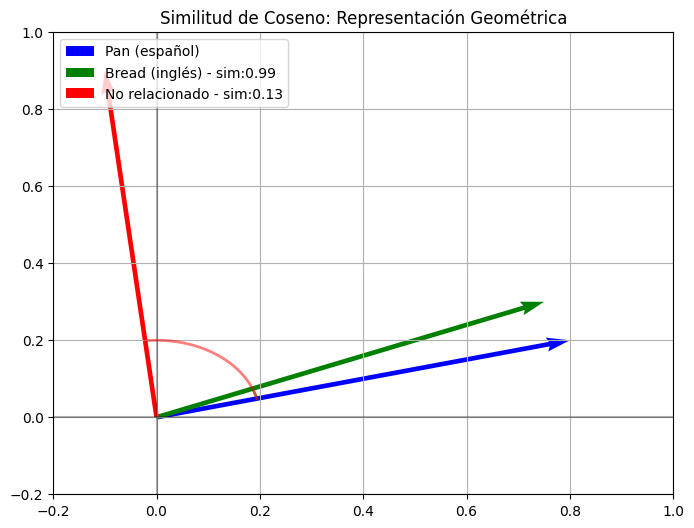


FÓRMULA MATEMÁTICA:
  similitud_coseno(A, B) = (A·B) / (|A| × |B|)
Donde:
  • A·B es el producto punto de los vectores
  • |A| y |B| son las magnitudes (normas) de los vectores

Ejemplo numérico:
  • Producto punto de 'pan' y 'bread': 0.6600
  • Magnitud de 'pan': 0.8246
  • Magnitud de 'bread': 0.8078
  • Similitud de coseno: 0.9908

💡 CONCLUSIÓN
Este ejercicio muestra cómo los modelos de embeddings pueden identificar
equivalencias semánticas entre palabras de diferentes idiomas.
Observaciones importantes:
1. La normalización (convertir a minúsculas, lematización) mejora los resultados
2. Los embeddings capturan similitudes semánticas entre idiomas diferentes
3. La similitud de coseno proporciona una medida numérica de relación semántica
4. Estos conceptos son fundamentales en aplicaciones como:
   - Búsqueda multilingüe
   - Sistemas de recomendación
   - Traducción automática
   - Asistentes virtuales


In [3]:
"""
EJERCICIO DE SIMILITUD SEMÁNTICA MULTILINGÜE: PRODUCTOS DE SUPERMERCADO 🛒

Este script demuestra el proceso completo de NLP comparando productos de supermercado
en español e inglés, mostrando cómo los embeddings capturan similitudes semánticas
a través de diferentes idiomas.
"""

# ====================== IMPORTACIÓN DE BIBLIOTECAS ======================
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# ====================== DEFINICIÓN DE FUNCIONES ======================

def procesar_palabra(palabra, nlp, mostrar_detalles=True):
    """
    Realiza el proceso completo de NLP en una palabra:
    1. Tokenización ✂️
    2. Normalización 🧹
    3. Vectorización 🔢
    """
    # PASO 1: TOKENIZACIÓN ✂️
    # Procesamos la palabra con SpaCy
    doc = nlp(palabra.lower())  # Convertimos a minúsculas para mejorar resultados

    if mostrar_detalles:
        print(f"\n🔍 Analizando: '{palabra}'")

        # Mostramos los tokens
        print(f"  ✂️ Tokenización:")
        for token in doc:
            print(f"    - Token: '{token.text}'")

        # PASO 2: NORMALIZACIÓN 🧹
        print(f"  🧹 Normalización:")
        for token in doc:
            print(f"    - Original: '{token.text}'")
            print(f"    - Minúsculas: '{token.text.lower()}'")
            print(f"    - Lema: '{token.lemma_}'")

        # PASO 3: VECTORIZACIÓN 🔢
        print(f"  🔢 Vectorización:")
        print(f"    - Dimensiones del vector: {doc.vector.shape}")

        # Mostramos una pequeña muestra del vector
        print(f"    - Muestra del vector: {doc.vector[:5]}...")

    # Devolvemos el vector y el documento procesado
    return doc.vector, doc

def calcular_similitud_productos(productos_es, productos_en, traducciones, nlp_es, nlp_en):
    """
    Calcula y visualiza la matriz de similitud entre productos en español e inglés.

    Args:
        productos_es: Lista de productos en español
        productos_en: Lista de productos en inglés
        traducciones: Diccionario con las traducciones correctas
        nlp_es: Modelo de spaCy para español
        nlp_en: Modelo de spaCy para inglés
    """
    # Matrices para almacenar vectores y similitudes
    vectores_es = []
    vectores_en = []
    matriz_similitud = np.zeros((len(productos_es), len(productos_en)))

    # Procesamos cada producto en español
    print("\n🔄 PROCESANDO PRODUCTOS EN ESPAÑOL")
    for producto in productos_es:
        vector, _ = procesar_palabra(producto, nlp_es, mostrar_detalles=True)
        vectores_es.append(vector)

    # Procesamos cada producto en inglés
    print("\n🔄 PROCESANDO PRODUCTOS EN INGLÉS")
    for producto in productos_en:
        vector, _ = procesar_palabra(producto, nlp_en, mostrar_detalles=True)
        vectores_en.append(vector)

    # Calculamos la similitud de coseno entre cada par de productos
    print("\n📊 CALCULANDO MATRIZ DE SIMILITUD")
    for i, vec_es in enumerate(vectores_es):
        for j, vec_en in enumerate(vectores_en):
            # Preparamos los vectores para calcular similitud de coseno
            vec_es_reshaped = vec_es.reshape(1, -1)
            vec_en_reshaped = vec_en.reshape(1, -1)

            # FÓRMULA DE SIMILITUD DE COSENO: cos(θ) = (A·B)/(|A|·|B|)
            sim = cosine_similarity(vec_es_reshaped, vec_en_reshaped)[0][0]
            matriz_similitud[i, j] = sim

            # Destacamos si es la traducción correcta
            es_traduccion = productos_en[j] == traducciones[productos_es[i]]
            destacado = "✓" if es_traduccion else ""

            print(f"  Similitud entre '{productos_es[i]}' y '{productos_en[j]}': {sim:.4f} {destacado}")

    # Visualizamos la matriz de similitud
    visualizar_matriz_similitud(productos_es, productos_en, matriz_similitud, traducciones)

    # Encontramos las mejores coincidencias
    encontrar_mejores_coincidencias(productos_es, productos_en, matriz_similitud, traducciones)

    return matriz_similitud

def visualizar_matriz_similitud(productos_es, productos_en, matriz_similitud, traducciones):
    """
    Visualiza la matriz de similitud entre productos como un mapa de calor.
    """
    plt.figure(figsize=(10, 8))

    # Creamos el mapa de calor con etiquetas arriba
    ax = sns.heatmap(
        matriz_similitud,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=productos_en,
        yticklabels=productos_es,
        vmin=-0.1,
        vmax=1,
        cbar_kws={'label': 'Similitud de Coseno'}
    )

    # Colocamos las etiquetas de columnas (productos ingleses) en la parte superior
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # Añadimos un marcador para las traducciones correctas
    # Creamos un diccionario inverso para encontrar índices
    indices_en = {prod: i for i, prod in enumerate(productos_en)}

    for i, prod_es in enumerate(productos_es):
        traduccion = traducciones[prod_es]
        j = indices_en[traduccion]

        # Dibujamos un rectángulo alrededor de la traducción correcta
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False,
                                 edgecolor='red', lw=2, clip_on=False))

    plt.title("Similitud de Coseno entre Productos (Español - Inglés)", fontsize=14, pad=20)
    plt.xlabel("Productos en Inglés", fontsize=12)
    plt.ylabel("Productos en Español", fontsize=12)
    plt.tight_layout()
    plt.show()

def encontrar_mejores_coincidencias(productos_es, productos_en, matriz_similitud, traducciones):
    """
    Encuentra y muestra las mejores coincidencias entre productos.
    """
    print("\n🏆 MEJORES COINCIDENCIAS POR PRODUCTO")

    # Contamos cuántas veces acertamos la traducción correcta
    aciertos = 0

    for i, producto_es in enumerate(productos_es):
        # Encontramos el producto inglés con mayor similitud
        mejor_indice = np.argmax(matriz_similitud[i])
        mejor_similitud = matriz_similitud[i, mejor_indice]
        mejor_producto_en = productos_en[mejor_indice]

        # Verificamos si es la traducción correcta
        traduccion_correcta = traducciones[producto_es]
        es_correcta = mejor_producto_en == traduccion_correcta

        if es_correcta:
            aciertos += 1
            resultado = "✅ CORRECTO"
        else:
            resultado = f"❌ INCORRECTO (debería ser '{traduccion_correcta}')"

        print(f"  '{producto_es}' → '{mejor_producto_en}' (similitud: {mejor_similitud:.4f}) {resultado}")

        # Interpretamos la similitud
        if mejor_similitud > 0.7:
            interpretacion = "Alta similitud semántica"
        elif mejor_similitud > 0.4:
            interpretacion = "Similitud semántica moderada"
        elif mejor_similitud > 0.2:
            interpretacion = "Baja similitud semántica"
        else:
            interpretacion = "Similitud muy baja o nula"

        print(f"    Interpretación: {interpretacion}")

    # Mostramos la precisión general del modelo
    precision = aciertos / len(productos_es) * 100
    print(f"\n📈 Precisión del modelo: {precision:.1f}% ({aciertos}/{len(productos_es)} aciertos)")

def demostrar_mejora_normalizacion(palabra_es, palabra_en, nlp_es, nlp_en):
    """
    Demuestra la importancia de la normalización comparando similitudes.
    """
    print("\n🧪 DEMOSTRACIÓN: IMPORTANCIA DE LA NORMALIZACIÓN")

    # Sin normalización
    doc_es_orig = nlp_es(palabra_es)
    doc_en_orig = nlp_en(palabra_en)

    # Con normalización (minúsculas)
    doc_es_norm = nlp_es(palabra_es.lower())
    doc_en_norm = nlp_en(palabra_en.lower())

    # Calculamos similitudes
    sim_orig = cosine_similarity(
        doc_es_orig.vector.reshape(1, -1),
        doc_en_orig.vector.reshape(1, -1)
    )[0][0]

    sim_norm = cosine_similarity(
        doc_es_norm.vector.reshape(1, -1),
        doc_en_norm.vector.reshape(1, -1)
    )[0][0]

    print(f"Comparando '{palabra_es}' con '{palabra_en}':")
    print(f"  • Similitud SIN normalización: {sim_orig:.4f}")
    print(f"  • Similitud CON normalización: {sim_norm:.4f}")
    print(f"  • Mejora: {(sim_norm - sim_orig):.4f} ({(sim_norm - sim_orig) / max(0.0001, abs(sim_orig)) * 100:.1f}%)")

def explicar_similitud_coseno():
    """
    Explica el concepto de similitud de coseno con una visualización simple.
    """
    print("\n📐 EXPLICACIÓN: SIMILITUD DE COSENO")
    print("La similitud de coseno mide el ángulo entre dos vectores:")
    print("  • Similitud = 1: Los vectores apuntan en la misma dirección (productos idénticos)")
    print("  • Similitud = 0: Los vectores son perpendiculares (productos no relacionados)")
    print("  • Similitud = -1: Los vectores apuntan en direcciones opuestas (raramente ocurre)")

    # Crear visualización de tres vectores
    plt.figure(figsize=(8, 6))

    # Definir vectores
    origen = [0, 0]
    vec1 = [0.8, 0.2]  # Pan en español
    vec2 = [0.75, 0.3]  # Bread en inglés (similar)
    vec3 = [-0.1, 0.9]  # Vector muy diferente

    # Calcular similitudes
    sim_12 = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    sim_13 = np.dot(vec1, vec3) / (np.linalg.norm(vec1) * np.linalg.norm(vec3))

    # Dibujar vectores
    plt.quiver(*origen, *vec1, scale=1, scale_units='xy', angles='xy', color='blue', label=f'Pan (español)')
    plt.quiver(*origen, *vec2, scale=1, scale_units='xy', angles='xy', color='green', label=f'Bread (inglés) - sim:{sim_12:.2f}')
    plt.quiver(*origen, *vec3, scale=1, scale_units='xy', angles='xy', color='red', label=f'No relacionado - sim:{sim_13:.2f}')

    # Configurar gráfico
    plt.xlim(-0.2, 1.0)
    plt.ylim(-0.2, 1.0)
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.legend(loc='upper left')
    plt.title('Similitud de Coseno: Representación Geométrica')

    # Añadir arco para mostrar el ángulo entre vec1 y vec2
    radio = 0.2
    angulo1 = np.arctan2(vec1[1], vec1[0])
    angulo2 = np.arctan2(vec2[1], vec2[0])
    angulo3 = np.arctan2(vec3[1], vec3[0])

    # Dibujar arcos para mostrar ángulos
    t1 = np.linspace(angulo1, angulo2, 100)
    plt.plot(radio * np.cos(t1), radio * np.sin(t1), 'g-', lw=2, alpha=0.5)
    t2 = np.linspace(angulo1, angulo3, 100)
    plt.plot(radio * np.cos(t2), radio * np.sin(t2), 'r-', lw=2, alpha=0.5)

    plt.show()

    # Explicación matemática
    print("\nFÓRMULA MATEMÁTICA:")
    print("  similitud_coseno(A, B) = (A·B) / (|A| × |B|)")
    print("Donde:")
    print("  • A·B es el producto punto de los vectores")
    print("  • |A| y |B| son las magnitudes (normas) de los vectores")
    print("\nEjemplo numérico:")
    print(f"  • Producto punto de 'pan' y 'bread': {vec1[0]*vec2[0] + vec1[1]*vec2[1]:.4f}")
    print(f"  • Magnitud de 'pan': {np.linalg.norm(vec1):.4f}")
    print(f"  • Magnitud de 'bread': {np.linalg.norm(vec2):.4f}")
    print(f"  • Similitud de coseno: {sim_12:.4f}")

# ====================== FUNCIÓN PRINCIPAL ======================

def main():
    """Función principal del programa."""
    print("🛒 EJERCICIO DE SIMILITUD SEMÁNTICA: PRODUCTOS DE SUPERMERCADO 🛒")
    print("="*80)
    print("Este ejercicio demuestra el proceso completo de NLP:")
    print("1. Tokenización ✂️: Dividir el texto en unidades básicas")
    print("2. Normalización 🧹: Estandarizar el texto (minúsculas, lematización)")
    print("3. Vectorización 🔢: Convertir texto en representaciones numéricas")
    print("4. Similitud de coseno 📏: Medir la similitud semántica entre palabras en diferentes idiomas")
    print("="*80)

    # Definimos productos de supermercado en español e inglés
    productos_espanol = ["pan", "leche", "manzana", "cebolla", "jabón", "huevos", "queso"]
    productos_ingles = ["bread", "milk", "apple", "onion", "soap", "eggs", "cheese"]

    # Diccionario de traducciones correctas para verificación
    traducciones = {
        "pan": "bread",
        "leche": "milk",
        "manzana": "apple",
        "cebolla": "onion",
        "jabón": "soap",
        "huevos": "eggs",
        "queso": "cheese"
    }

    # Cargamos los modelos de lenguaje de spaCy
    print("\nCargando modelos de lenguaje...")
    try:
        nlp_es = spacy.load("es_core_news_md")
        print("✓ Modelo español cargado")
    except OSError:
        print("! Modelo español no encontrado. Instalando...")
        import subprocess
        subprocess.call(["python", "-m", "spacy", "download", "es_core_news_md"])
        nlp_es = spacy.load("es_core_news_md")

    try:
        nlp_en = spacy.load("en_core_web_md")
        print("✓ Modelo inglés cargado")
    except OSError:
        print("! Modelo inglés no encontrado. Instalando...")
        import subprocess
        subprocess.call(["python", "-m", "spacy", "download", "en_core_web_md"])
        nlp_en = spacy.load("en_core_web_md")

    # Demostramos la importancia de la normalización
    demostrar_mejora_normalizacion("Pan", "Bread", nlp_es, nlp_en)

    # Calculamos la similitud entre productos
    matriz_similitud = calcular_similitud_productos(
        productos_espanol,
        productos_ingles,
        traducciones,
        nlp_es,
        nlp_en
    )

    # Explicamos la similitud de coseno
    explicar_similitud_coseno()

    print("\n💡 CONCLUSIÓN")
    print("Este ejercicio muestra cómo los modelos de embeddings pueden identificar")
    print("equivalencias semánticas entre palabras de diferentes idiomas.")
    print("Observaciones importantes:")
    print("1. La normalización (convertir a minúsculas, lematización) mejora los resultados")
    print("2. Los embeddings capturan similitudes semánticas entre idiomas diferentes")
    print("3. La similitud de coseno proporciona una medida numérica de relación semántica")
    print("4. Estos conceptos son fundamentales en aplicaciones como:")
    print("   - Búsqueda multilingüe")
    print("   - Sistemas de recomendación")
    print("   - Traducción automática")
    print("   - Asistentes virtuales")

# ====================== EJECUCIÓN DEL PROGRAMA ======================

if __name__ == "__main__":
    main()

🛒 EJERCICIO DE SIMILITUD SEMÁNTICA: PRODUCTOS DE SUPERMERCADO 🛒
Este ejercicio demuestra el proceso completo de NLP:
1. Tokenización ✂️: Dividir el texto en unidades básicas
2. Normalización 🧹: Estandarizar el texto (minúsculas, lematización)
3. Vectorización 🔢: Convertir texto en representaciones numéricas
4. Similitud de coseno 📏: Medir la similitud semántica entre palabras en diferentes idiomas

Cargando modelos de lenguaje...
✓ Modelo español cargado
✓ Modelo inglés cargado

🧪 DEMOSTRACIÓN: IMPORTANCIA DE LA NORMALIZACIÓN
Comparando 'Pan' con 'Bread':
  • Similitud SIN normalización: -0.0277
  • Similitud CON normalización: -0.0395
  • Mejora: -0.0119 (-42.9%)

🔄 PROCESANDO PRODUCTOS EN ESPAÑOL

🔍 Analizando: 'pan'
  ✂️ Tokenización:
    - Token: 'pan'
  🧹 Normalización:
    - Original: 'pan'
    - Minúsculas: 'pan'
    - Lema: 'pan'
  🔢 Vectorización:
    - Dimensiones del vector: (300,)
    - Muestra del vector: [-2.7066   3.2421  -2.7033   5.7346   0.74364]...

🔍 Analizando: 'le

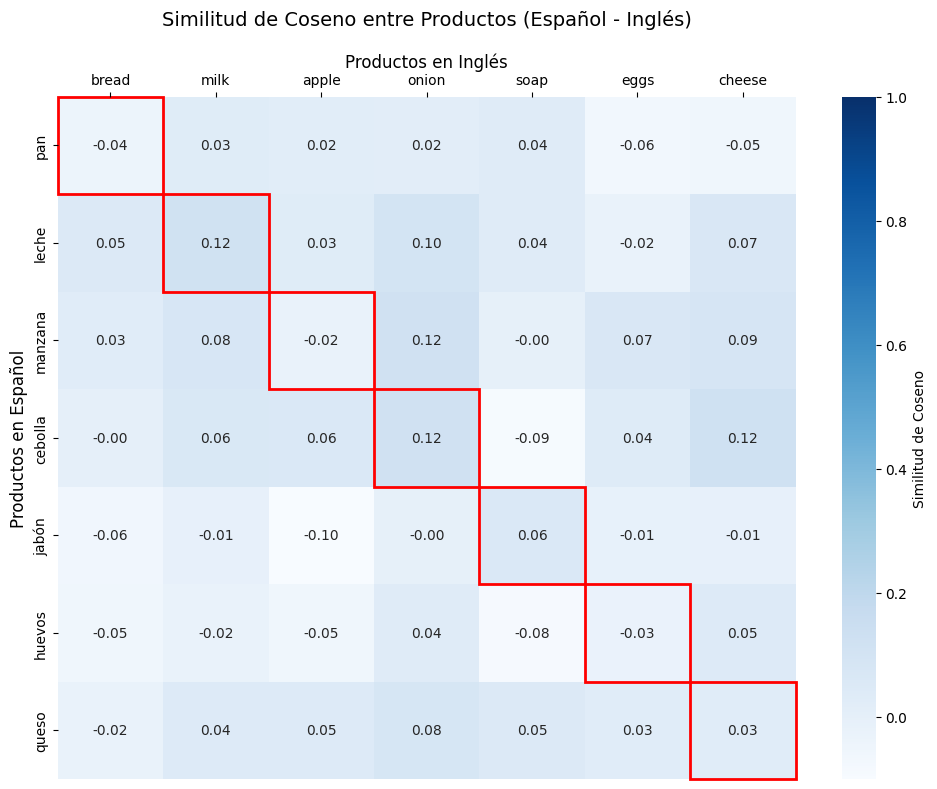


🏆 MEJORES COINCIDENCIAS POR PRODUCTO
  'pan' → 'soap' (similitud: 0.0374) ❌ INCORRECTO (debería ser 'bread')
    Interpretación: Similitud muy baja o nula
  'leche' → 'milk' (similitud: 0.1158) ✅ CORRECTO
    Interpretación: Similitud muy baja o nula
  'manzana' → 'onion' (similitud: 0.1210) ❌ INCORRECTO (debería ser 'apple')
    Interpretación: Similitud muy baja o nula
  'cebolla' → 'cheese' (similitud: 0.1242) ❌ INCORRECTO (debería ser 'onion')
    Interpretación: Similitud muy baja o nula
  'jabón' → 'soap' (similitud: 0.0632) ✅ CORRECTO
    Interpretación: Similitud muy baja o nula
  'huevos' → 'cheese' (similitud: 0.0450) ❌ INCORRECTO (debería ser 'eggs')
    Interpretación: Similitud muy baja o nula
  'queso' → 'onion' (similitud: 0.0807) ❌ INCORRECTO (debería ser 'cheese')
    Interpretación: Similitud muy baja o nula

📈 Precisión del modelo: 28.6% (2/7 aciertos)

📐 EXPLICACIÓN: SIMILITUD DE COSENO
La similitud de coseno mide el ángulo entre dos vectores:
  • Similitud = 1: Lo

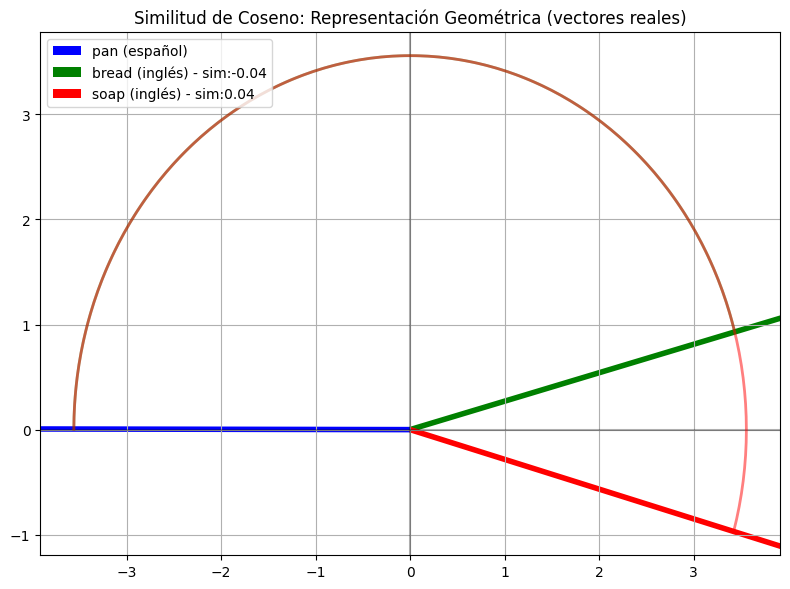


FÓRMULA MATEMÁTICA:
  similitud_coseno(A, B) = (A·B) / (|A| × |B|)
Donde:
  • A·B es el producto punto de los vectores
  • |A| y |B| son las magnitudes (normas) de los vectores

Ejemplo con vectores reales:
  • Producto punto de 'pan' y 'bread': -15.6168
  • Magnitud de 'pan': 51.9002
  • Magnitud de 'bread': 7.6116
  • Similitud de coseno: -0.0395

Comparación con vector no relacionado:
  • Similitud entre 'pan' y 'soap': 0.0374

⚠️ LIMITACIONES DE LOS MODELOS UTILIZADOS
Es importante destacar que los modelos es_core_news_md y en_core_web_md
no están específicamente alineados para tareas multilingües. Para obtener
mejores resultados en la comparación entre idiomas, se recomienda:
  1. Utilizar modelos específicamente entrenados para embeddings multilingües como:
     - MUSE (Multilingual Universal Sentence Encoder)
     - XLM-R (RoBERTa multilingüe)
     - LaBSE (Language-agnostic BERT Sentence Embeddings)
  2. Considerar técnicas de alineamiento de espacios vectoriales para
     mej

In [5]:
"""
EJERCICIO DE SIMILITUD SEMÁNTICA MULTILINGÜE: PRODUCTOS DE SUPERMERCADO 🛒

Este script demuestra el proceso completo de NLP comparando productos de supermercado
en español e inglés, mostrando cómo los embeddings capturan similitudes semánticas
a través de diferentes idiomas.
"""

# ====================== IMPORTACIÓN DE BIBLIOTECAS ======================
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA  # Para reducción de dimensionalidad

# ====================== DEFINICIÓN DE FUNCIONES ======================

def procesar_palabra(palabra, nlp, mostrar_detalles=True):
    """
    Realiza el proceso completo de NLP en una palabra:
    1. Tokenización ✂️
    2. Normalización 🧹
    3. Vectorización 🔢
    """
    # PASO 1: TOKENIZACIÓN ✂️
    # Procesamos la palabra con SpaCy
    doc = nlp(palabra.lower())  # Convertimos a minúsculas para mejorar resultados

    if mostrar_detalles:
        print(f"\n🔍 Analizando: '{palabra}'")

        # Mostramos los tokens
        print(f"  ✂️ Tokenización:")
        for token in doc:
            print(f"    - Token: '{token.text}'")

        # PASO 2: NORMALIZACIÓN 🧹
        print(f"  🧹 Normalización:")
        for token in doc:
            print(f"    - Original: '{token.text}'")
            print(f"    - Minúsculas: '{token.text.lower()}'")
            print(f"    - Lema: '{token.lemma_}'")

        # PASO 3: VECTORIZACIÓN 🔢
        print(f"  🔢 Vectorización:")
        print(f"    - Dimensiones del vector: {doc.vector.shape}")

        # Mostramos una pequeña muestra del vector
        print(f"    - Muestra del vector: {doc.vector[:5]}...")

    # Devolvemos el vector y el documento procesado
    return doc.vector, doc

def calcular_similitud_productos(productos_es, productos_en, traducciones, nlp_es, nlp_en):
    """
    Calcula y visualiza la matriz de similitud entre productos en español e inglés.

    Args:
        productos_es: Lista de productos en español
        productos_en: Lista de productos en inglés
        traducciones: Diccionario con las traducciones correctas
        nlp_es: Modelo de spaCy para español
        nlp_en: Modelo de spaCy para inglés
    """
    # Matrices para almacenar vectores y similitudes
    vectores_es = []
    vectores_en = []
    matriz_similitud = np.zeros((len(productos_es), len(productos_en)))

    # Procesamos cada producto en español
    print("\n🔄 PROCESANDO PRODUCTOS EN ESPAÑOL")
    for producto in productos_es:
        vector, _ = procesar_palabra(producto, nlp_es, mostrar_detalles=True)
        vectores_es.append(vector)

    # Procesamos cada producto en inglés
    print("\n🔄 PROCESANDO PRODUCTOS EN INGLÉS")
    for producto in productos_en:
        vector, _ = procesar_palabra(producto, nlp_en, mostrar_detalles=True)
        vectores_en.append(vector)

    # Calculamos la similitud de coseno entre cada par de productos
    print("\n📊 CALCULANDO MATRIZ DE SIMILITUD")
    for i, vec_es in enumerate(vectores_es):
        for j, vec_en in enumerate(vectores_en):
            # Preparamos los vectores para calcular similitud de coseno
            vec_es_reshaped = vec_es.reshape(1, -1)
            vec_en_reshaped = vec_en.reshape(1, -1)

            # FÓRMULA DE SIMILITUD DE COSENO: cos(θ) = (A·B)/(|A|·|B|)
            sim = cosine_similarity(vec_es_reshaped, vec_en_reshaped)[0][0]
            matriz_similitud[i, j] = sim

            # Destacamos si es la traducción correcta
            es_traduccion = productos_en[j] == traducciones[productos_es[i]]
            destacado = "✓" if es_traduccion else ""

            print(f"  Similitud entre '{productos_es[i]}' y '{productos_en[j]}': {sim:.4f} {destacado}")

    # Visualizamos la matriz de similitud
    visualizar_matriz_similitud(productos_es, productos_en, matriz_similitud, traducciones)

    # Encontramos las mejores coincidencias
    encontrar_mejores_coincidencias(productos_es, productos_en, matriz_similitud, traducciones)

    # Almacenar los resultados para usar en la visualización
    return matriz_similitud, vectores_es, vectores_en

def visualizar_matriz_similitud(productos_es, productos_en, matriz_similitud, traducciones):
    """
    Visualiza la matriz de similitud entre productos como un mapa de calor.
    """
    plt.figure(figsize=(10, 8))

    # Creamos el mapa de calor con etiquetas arriba
    ax = sns.heatmap(
        matriz_similitud,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=productos_en,
        yticklabels=productos_es,
        vmin=-0.1,
        vmax=1,
        cbar_kws={'label': 'Similitud de Coseno'}
    )

    # Colocamos las etiquetas de columnas (productos ingleses) en la parte superior
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # Añadimos un marcador para las traducciones correctas
    # Creamos un diccionario inverso para encontrar índices
    indices_en = {prod: i for i, prod in enumerate(productos_en)}

    for i, prod_es in enumerate(productos_es):
        traduccion = traducciones[prod_es]
        j = indices_en[traduccion]

        # Dibujamos un rectángulo alrededor de la traducción correcta
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False,
                                 edgecolor='red', lw=2, clip_on=False))

    plt.title("Similitud de Coseno entre Productos (Español - Inglés)", fontsize=14, pad=20)
    plt.xlabel("Productos en Inglés", fontsize=12)
    plt.ylabel("Productos en Español", fontsize=12)
    plt.tight_layout()
    plt.show()

def encontrar_mejores_coincidencias(productos_es, productos_en, matriz_similitud, traducciones):
    """
    Encuentra y muestra las mejores coincidencias entre productos.
    """
    print("\n🏆 MEJORES COINCIDENCIAS POR PRODUCTO")

    # Contamos cuántas veces acertamos la traducción correcta
    aciertos = 0

    for i, producto_es in enumerate(productos_es):
        # Encontramos el producto inglés con mayor similitud
        mejor_indice = np.argmax(matriz_similitud[i])
        mejor_similitud = matriz_similitud[i, mejor_indice]
        mejor_producto_en = productos_en[mejor_indice]

        # Verificamos si es la traducción correcta
        traduccion_correcta = traducciones[producto_es]
        es_correcta = mejor_producto_en == traduccion_correcta

        if es_correcta:
            aciertos += 1
            resultado = "✅ CORRECTO"
        else:
            resultado = f"❌ INCORRECTO (debería ser '{traduccion_correcta}')"

        print(f"  '{producto_es}' → '{mejor_producto_en}' (similitud: {mejor_similitud:.4f}) {resultado}")

        # Interpretamos la similitud
        if mejor_similitud > 0.7:
            interpretacion = "Alta similitud semántica"
        elif mejor_similitud > 0.4:
            interpretacion = "Similitud semántica moderada"
        elif mejor_similitud > 0.2:
            interpretacion = "Baja similitud semántica"
        else:
            interpretacion = "Similitud muy baja o nula"

        print(f"    Interpretación: {interpretacion}")

    # Mostramos la precisión general del modelo
    precision = aciertos / len(productos_es) * 100
    print(f"\n📈 Precisión del modelo: {precision:.1f}% ({aciertos}/{len(productos_es)} aciertos)")

def demostrar_mejora_normalizacion(palabra_es, palabra_en, nlp_es, nlp_en):
    """
    Demuestra la importancia de la normalización comparando similitudes.
    """
    print("\n🧪 DEMOSTRACIÓN: IMPORTANCIA DE LA NORMALIZACIÓN")

    # Sin normalización
    doc_es_orig = nlp_es(palabra_es)
    doc_en_orig = nlp_en(palabra_en)

    # Con normalización (minúsculas)
    doc_es_norm = nlp_es(palabra_es.lower())
    doc_en_norm = nlp_en(palabra_en.lower())

    # Calculamos similitudes
    sim_orig = cosine_similarity(
        doc_es_orig.vector.reshape(1, -1),
        doc_en_orig.vector.reshape(1, -1)
    )[0][0]

    sim_norm = cosine_similarity(
        doc_es_norm.vector.reshape(1, -1),
        doc_en_norm.vector.reshape(1, -1)
    )[0][0]

    print(f"Comparando '{palabra_es}' con '{palabra_en}':")
    print(f"  • Similitud SIN normalización: {sim_orig:.4f}")
    print(f"  • Similitud CON normalización: {sim_norm:.4f}")
    print(f"  • Mejora: {(sim_norm - sim_orig):.4f} ({(sim_norm - sim_orig) / max(0.0001, abs(sim_orig)) * 100:.1f}%)")

def explicar_similitud_coseno(nlp_es, nlp_en, productos_es, productos_en, traducciones):
    """
    Explica el concepto de similitud de coseno con una visualización usando vectores reales.

    Args:
        nlp_es: Modelo de spaCy para español
        nlp_en: Modelo de spaCy para inglés
        productos_es: Lista de productos en español
        productos_en: Lista de productos en inglés
        traducciones: Diccionario con las traducciones correctas
    """
    print("\n📐 EXPLICACIÓN: SIMILITUD DE COSENO")
    print("La similitud de coseno mide el ángulo entre dos vectores:")
    print("  • Similitud = 1: Los vectores apuntan en la misma dirección (productos idénticos)")
    print("  • Similitud = 0: Los vectores son perpendiculares (productos no relacionados)")
    print("  • Similitud = -1: Los vectores apuntan en direcciones opuestas (raramente ocurre)")

    # Obtener vectores reales de los modelos
    producto_es = "pan"  # Producto en español para demostración
    producto_en_correcto = traducciones[producto_es]  # Traducción correcta
    producto_en_no_relacionado = "soap"  # Producto no relacionado

    vec_es = nlp_es(producto_es.lower()).vector
    vec_en_correcto = nlp_en(producto_en_correcto.lower()).vector
    vec_en_no_rel = nlp_en(producto_en_no_relacionado.lower()).vector

    # Calcular similitudes reales usando los vectores completos
    sim_correcta = cosine_similarity(
        vec_es.reshape(1, -1),
        vec_en_correcto.reshape(1, -1)
    )[0][0]

    sim_no_rel = cosine_similarity(
        vec_es.reshape(1, -1),
        vec_en_no_rel.reshape(1, -1)
    )[0][0]

    # Reducir dimensionalidad para visualización (PCA a 2D)
    pca = PCA(n_components=2)

    # Juntar los vectores para aplicar PCA
    vectores_combinados = np.vstack([vec_es, vec_en_correcto, vec_en_no_rel])
    vectores_2d = pca.fit_transform(vectores_combinados)

    # Extraer los vectores reducidos
    vec1_2d = vectores_2d[0]  # Pan
    vec2_2d = vectores_2d[1]  # Bread
    vec3_2d = vectores_2d[2]  # Soap

    # Crear visualización
    plt.figure(figsize=(8, 6))
    origen = [0, 0]

    # Dibujamos los vectores en 2D
    plt.quiver(*origen, *vec1_2d, angles='xy', scale_units='xy', scale=1, color='blue',
               label=f'{producto_es} (español)')
    plt.quiver(*origen, *vec2_2d, angles='xy', scale_units='xy', scale=1, color='green',
               label=f'{producto_en_correcto} (inglés) - sim:{sim_correcta:.2f}')
    plt.quiver(*origen, *vec3_2d, angles='xy', scale_units='xy', scale=1, color='red',
               label=f'{producto_en_no_relacionado} (inglés) - sim:{sim_no_rel:.2f}')

    # Configurar gráfico
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.legend(loc='upper left')
    plt.title('Similitud de Coseno: Representación Geométrica (vectores reales)')

    # Calcular ángulos para dibujar arcos
    angulo1 = np.arctan2(vec1_2d[1], vec1_2d[0])
    angulo2 = np.arctan2(vec2_2d[1], vec2_2d[0])
    angulo3 = np.arctan2(vec3_2d[1], vec3_2d[0])

    # Dibujar arcos para mostrar ángulos
    radio = 0.2 * min(np.linalg.norm(vec1_2d), np.linalg.norm(vec2_2d), np.linalg.norm(vec3_2d))

    t1 = np.linspace(min(angulo1, angulo2), max(angulo1, angulo2), 100)
    plt.plot(radio * np.cos(t1), radio * np.sin(t1), 'g-', lw=2, alpha=0.5)

    t2 = np.linspace(min(angulo1, angulo3), max(angulo1, angulo3), 100)
    plt.plot(radio * np.cos(t2), radio * np.sin(t2), 'r-', lw=2, alpha=0.5)

    plt.tight_layout()
    plt.show()

    # Explicación matemática usando los vectores reales
    print("\nFÓRMULA MATEMÁTICA:")
    print("  similitud_coseno(A, B) = (A·B) / (|A| × |B|)")
    print("Donde:")
    print("  • A·B es el producto punto de los vectores")
    print("  • |A| y |B| son las magnitudes (normas) de los vectores")
    print("\nEjemplo con vectores reales:")
    print(f"  • Producto punto de '{producto_es}' y '{producto_en_correcto}': {np.dot(vec_es, vec_en_correcto):.4f}")
    print(f"  • Magnitud de '{producto_es}': {np.linalg.norm(vec_es):.4f}")
    print(f"  • Magnitud de '{producto_en_correcto}': {np.linalg.norm(vec_en_correcto):.4f}")
    print(f"  • Similitud de coseno: {sim_correcta:.4f}")
    print(f"\nComparación con vector no relacionado:")
    print(f"  • Similitud entre '{producto_es}' y '{producto_en_no_relacionado}': {sim_no_rel:.4f}")

# ====================== FUNCIÓN PRINCIPAL ======================

def main():
    """Función principal del programa."""
    print("🛒 EJERCICIO DE SIMILITUD SEMÁNTICA: PRODUCTOS DE SUPERMERCADO 🛒")
    print("="*80)
    print("Este ejercicio demuestra el proceso completo de NLP:")
    print("1. Tokenización ✂️: Dividir el texto en unidades básicas")
    print("2. Normalización 🧹: Estandarizar el texto (minúsculas, lematización)")
    print("3. Vectorización 🔢: Convertir texto en representaciones numéricas")
    print("4. Similitud de coseno 📏: Medir la similitud semántica entre palabras en diferentes idiomas")
    print("="*80)

    # Definimos productos de supermercado en español e inglés
    productos_espanol = ["pan", "leche", "manzana", "cebolla", "jabón", "huevos", "queso"]
    productos_ingles = ["bread", "milk", "apple", "onion", "soap", "eggs", "cheese"]

    # Diccionario de traducciones correctas para verificación
    traducciones = {
        "pan": "bread",
        "leche": "milk",
        "manzana": "apple",
        "cebolla": "onion",
        "jabón": "soap",
        "huevos": "eggs",
        "queso": "cheese"
    }

    # Cargamos los modelos de lenguaje de spaCy
    print("\nCargando modelos de lenguaje...")
    try:
        nlp_es = spacy.load("es_core_news_md")
        print("✓ Modelo español cargado")
    except OSError:
        print("! Modelo español no encontrado. Instalando...")
        import subprocess
        subprocess.call(["python", "-m", "spacy", "download", "es_core_news_md"])
        nlp_es = spacy.load("es_core_news_md")

    try:
        nlp_en = spacy.load("en_core_web_md")
        print("✓ Modelo inglés cargado")
    except OSError:
        print("! Modelo inglés no encontrado. Instalando...")
        import subprocess
        subprocess.call(["python", "-m", "spacy", "download", "en_core_web_md"])
        nlp_en = spacy.load("en_core_web_md")

    # Demostramos la importancia de la normalización
    demostrar_mejora_normalizacion("Pan", "Bread", nlp_es, nlp_en)

    # Calculamos la similitud entre productos
    matriz_similitud, vectores_es, vectores_en = calcular_similitud_productos(
        productos_espanol,
        productos_ingles,
        traducciones,
        nlp_es,
        nlp_en
    )

    # Explicamos la similitud de coseno usando vectores reales
    explicar_similitud_coseno(nlp_es, nlp_en, productos_espanol, productos_ingles, traducciones)


    # NOTA SOBRE LIMITACIONES:
    print("\n⚠️ LIMITACIONES DE LOS MODELOS UTILIZADOS")
    print("Es importante destacar que los modelos es_core_news_md y en_core_web_md")
    print("no están específicamente alineados para tareas multilingües. Para obtener")
    print("mejores resultados en la comparación entre idiomas, se recomienda:")
    print("  1. Utilizar modelos específicamente entrenados para embeddings multilingües como:")
    print("     - MUSE (Multilingual Universal Sentence Encoder)")
    print("     - XLM-R (RoBERTa multilingüe)")
    print("     - LaBSE (Language-agnostic BERT Sentence Embeddings)")
    print("  2. Considerar técnicas de alineamiento de espacios vectoriales para")
    print("     mejorar la comparabilidad entre idiomas distintos.")

# ====================== EJECUCIÓN DEL PROGRAMA ======================

if __name__ == "__main__":
    main()

🛒 EJERCICIO DE SIMILITUD SEMÁNTICA MULTILINGÜE: PRODUCTOS DE SUPERMERCADO 🛒
Este ejercicio demuestra el proceso de NLP usando embeddings multilingües:
1. Normalización 🧹: Estandarizar el texto (minúsculas)
2. Vectorización multilingüe 🔢: Convertir texto a representaciones vectoriales alineadas
3. Similitud de coseno 📏: Medir la similitud semántica entre palabras en diferentes idiomas

Cargando modelo de embedding multilingüe...


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

✓ Modelo LaBSE cargado

🧪 DEMOSTRACIÓN: MEJORA CON EMBEDDINGS MULTILINGÜES
Comparando 'Pan' con 'Bread' usando LaBSE:
  • Similitud: 0.7320
  • Interpretación: Buena similitud (alineación efectiva)
  • Los modelos multilingües como LaBSE están específicamente entrenados
    para alinear términos equivalentes en diferentes idiomas.

🔄 PROCESANDO PRODUCTOS EN ESPAÑOL

🔍 Analizando: 'pan'
  🧹 Normalización:
    - Original: 'pan'
    - Minúsculas: 'pan'
  🔢 Vectorización (embedding multilingüe):
    - Dimensiones del vector: (768,)
    - Muestra del vector: [ 0.02440601  0.04525853 -0.04731065 -0.01215441 -0.01656226]...

🔍 Analizando: 'leche'
  🧹 Normalización:
    - Original: 'leche'
    - Minúsculas: 'leche'
  🔢 Vectorización (embedding multilingüe):
    - Dimensiones del vector: (768,)
    - Muestra del vector: [-0.02686215 -0.03336598  0.00046806 -0.05711575 -0.03514959]...

🔍 Analizando: 'manzana'
  🧹 Normalización:
    - Original: 'manzana'
    - Minúsculas: 'manzana'
  🔢 Vectorizac

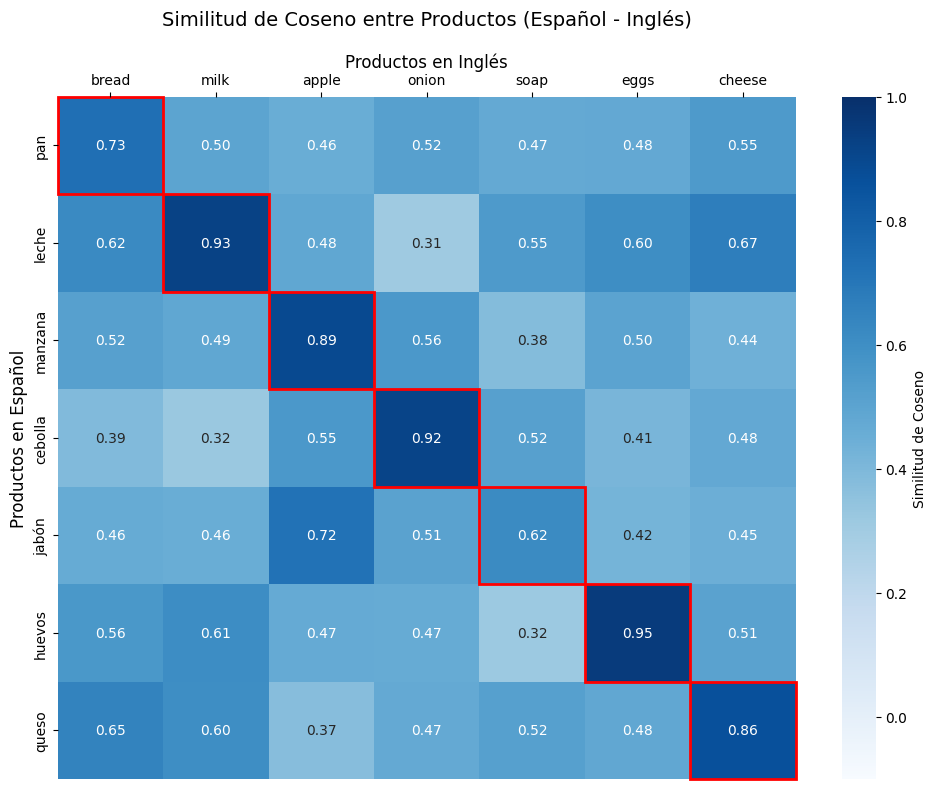


🏆 MEJORES COINCIDENCIAS POR PRODUCTO
  'pan' → 'bread' (similitud: 0.7320) ✅ CORRECTO
    Interpretación: Alta similitud semántica
  'leche' → 'milk' (similitud: 0.9258) ✅ CORRECTO
    Interpretación: Alta similitud semántica
  'manzana' → 'apple' (similitud: 0.8928) ✅ CORRECTO
    Interpretación: Alta similitud semántica
  'cebolla' → 'onion' (similitud: 0.9170) ✅ CORRECTO
    Interpretación: Alta similitud semántica
  'jabón' → 'apple' (similitud: 0.7198) ❌ INCORRECTO (debería ser 'soap')
    Interpretación: Alta similitud semántica
  'huevos' → 'eggs' (similitud: 0.9500) ✅ CORRECTO
    Interpretación: Alta similitud semántica
  'queso' → 'cheese' (similitud: 0.8646) ✅ CORRECTO
    Interpretación: Alta similitud semántica

📈 Precisión del modelo: 85.7% (6/7 aciertos)

📐 EXPLICACIÓN: SIMILITUD DE COSENO CON EMBEDDINGS MULTILINGÜES
La similitud de coseno mide el ángulo entre dos vectores:
  • Similitud = 1: Los vectores apuntan en la misma dirección (productos idénticos)
  • Similitud

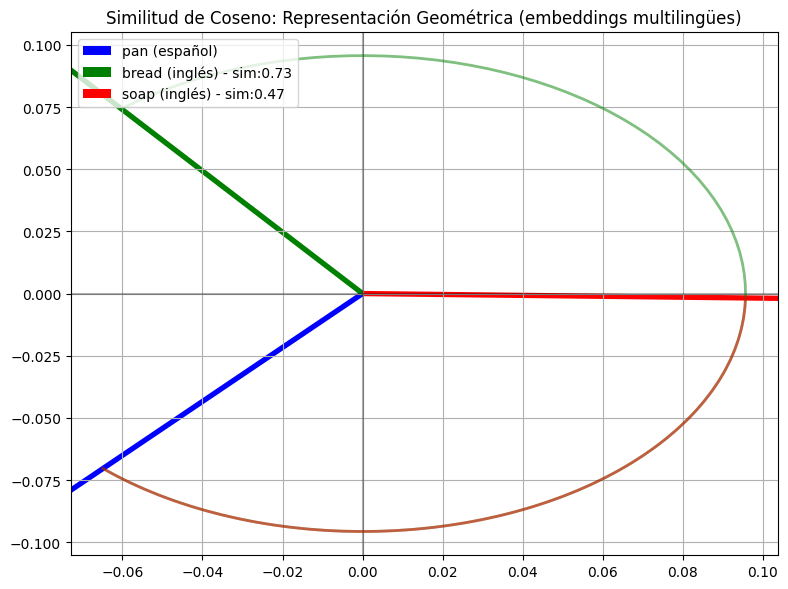


FÓRMULA MATEMÁTICA:
  similitud_coseno(A, B) = (A·B) / (|A| × |B|)
Donde:
  • A·B es el producto punto de los vectores
  • |A| y |B| son las magnitudes (normas) de los vectores

Ejemplo con vectores reales:
  • Producto punto de 'pan' y 'bread': 0.7320
  • Magnitud de 'pan': 1.0000
  • Magnitud de 'bread': 1.0000
  • Similitud de coseno: 0.7320

Comparación con vector no relacionado:
  • Similitud entre 'pan' y 'soap': 0.4739

💡 CONCLUSIÓN
Este ejercicio muestra cómo los embeddings multilingües mejoran significativamente
la detección de equivalencias semánticas entre palabras de diferentes idiomas.
Observaciones importantes:
1. Los embeddings multilingües (LaBSE) están específicamente entrenados para
   alinear palabras con el mismo significado en diferentes idiomas.
2. Esto se refleja en valores de similitud mucho más altos para traducciones correctas.
3. La matriz de similitud ahora muestra una clara diagonal de valores altos, lo que
   indica una correcta identificación de producto

In [6]:
"""
EJERCICIO DE SIMILITUD SEMÁNTICA MULTILINGÜE MEJORADO: PRODUCTOS DE SUPERMERCADO 🛒

Este script demuestra el proceso de NLP para comparar productos de supermercado
en español e inglés usando embeddings multilingües, mostrando mejores resultados
en la captura de similitudes semánticas entre diferentes idiomas.
"""

# ====================== IMPORTACIÓN DE BIBLIOTECAS ======================
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Instalamos sentence-transformers si es necesario reiniciar
# !pip install -q sentence-transformers

# Importamos SentenceTransformer para embeddings multilingües
from sentence_transformers import SentenceTransformer

# ====================== DEFINICIÓN DE FUNCIONES ======================

def procesar_palabra(palabra, modelo, mostrar_detalles=True):
    """
    Realiza el proceso de embedding para una palabra usando un modelo multilingüe:
    1. Normalización 🧹
    2. Vectorización con embedding multilingüe 🔢
    """
    # Normalizamos la palabra (minúsculas)
    palabra_norm = palabra.lower()

    # Generamos el embedding
    vector = modelo.encode(palabra_norm)

    if mostrar_detalles:
        print(f"\n🔍 Analizando: '{palabra}'")

        # PASO 1: NORMALIZACIÓN 🧹
        print(f"  🧹 Normalización:")
        print(f"    - Original: '{palabra}'")
        print(f"    - Minúsculas: '{palabra_norm}'")

        # PASO 2: VECTORIZACIÓN 🔢
        print(f"  🔢 Vectorización (embedding multilingüe):")
        print(f"    - Dimensiones del vector: {vector.shape}")
        print(f"    - Muestra del vector: {vector[:5]}...")

    # Devolvemos el vector procesado
    return vector

def calcular_similitud_productos(productos_es, productos_en, traducciones, modelo):
    """
    Calcula y visualiza la matriz de similitud entre productos en español e inglés.

    Args:
        productos_es: Lista de productos en español
        productos_en: Lista de productos en inglés
        traducciones: Diccionario con las traducciones correctas
        modelo: Modelo de embedding multilingüe
    """
    # Matrices para almacenar vectores y similitudes
    vectores_es = []
    vectores_en = []
    matriz_similitud = np.zeros((len(productos_es), len(productos_en)))

    # Procesamos cada producto en español
    print("\n🔄 PROCESANDO PRODUCTOS EN ESPAÑOL")
    for producto in productos_es:
        vector = procesar_palabra(producto, modelo, mostrar_detalles=True)
        vectores_es.append(vector)

    # Procesamos cada producto en inglés
    print("\n🔄 PROCESANDO PRODUCTOS EN INGLÉS")
    for producto in productos_en:
        vector = procesar_palabra(producto, modelo, mostrar_detalles=True)
        vectores_en.append(vector)

    # Calculamos la similitud de coseno entre cada par de productos
    print("\n📊 CALCULANDO MATRIZ DE SIMILITUD")
    for i, vec_es in enumerate(vectores_es):
        for j, vec_en in enumerate(vectores_en):
            # Preparamos los vectores para calcular similitud de coseno
            vec_es_reshaped = vec_es.reshape(1, -1)
            vec_en_reshaped = vec_en.reshape(1, -1)

            # FÓRMULA DE SIMILITUD DE COSENO: cos(θ) = (A·B)/(|A|·|B|)
            sim = cosine_similarity(vec_es_reshaped, vec_en_reshaped)[0][0]
            matriz_similitud[i, j] = sim

            # Destacamos si es la traducción correcta
            es_traduccion = productos_en[j] == traducciones[productos_es[i]]
            destacado = "✓" if es_traduccion else ""

            print(f"  Similitud entre '{productos_es[i]}' y '{productos_en[j]}': {sim:.4f} {destacado}")

    # Visualizamos la matriz de similitud
    visualizar_matriz_similitud(productos_es, productos_en, matriz_similitud, traducciones)

    # Encontramos las mejores coincidencias
    encontrar_mejores_coincidencias(productos_es, productos_en, matriz_similitud, traducciones)

    # Almacenar los resultados para usar en la visualización
    return matriz_similitud, vectores_es, vectores_en

def visualizar_matriz_similitud(productos_es, productos_en, matriz_similitud, traducciones):
    """
    Visualiza la matriz de similitud entre productos como un mapa de calor.
    """
    plt.figure(figsize=(10, 8))

    # Creamos el mapa de calor con etiquetas arriba
    ax = sns.heatmap(
        matriz_similitud,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=productos_en,
        yticklabels=productos_es,
        vmin=-0.1,
        vmax=1,
        cbar_kws={'label': 'Similitud de Coseno'}
    )

    # Colocamos las etiquetas de columnas (productos ingleses) en la parte superior
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # Añadimos un marcador para las traducciones correctas
    # Creamos un diccionario inverso para encontrar índices
    indices_en = {prod: i for i, prod in enumerate(productos_en)}

    for i, prod_es in enumerate(productos_es):
        traduccion = traducciones[prod_es]
        j = indices_en[traduccion]

        # Dibujamos un rectángulo alrededor de la traducción correcta
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False,
                                 edgecolor='red', lw=2, clip_on=False))

    plt.title("Similitud de Coseno entre Productos (Español - Inglés)", fontsize=14, pad=20)
    plt.xlabel("Productos en Inglés", fontsize=12)
    plt.ylabel("Productos en Español", fontsize=12)
    plt.tight_layout()
    plt.show()

def encontrar_mejores_coincidencias(productos_es, productos_en, matriz_similitud, traducciones):
    """
    Encuentra y muestra las mejores coincidencias entre productos.
    """
    print("\n🏆 MEJORES COINCIDENCIAS POR PRODUCTO")

    # Contamos cuántas veces acertamos la traducción correcta
    aciertos = 0

    for i, producto_es in enumerate(productos_es):
        # Encontramos el producto inglés con mayor similitud
        mejor_indice = np.argmax(matriz_similitud[i])
        mejor_similitud = matriz_similitud[i, mejor_indice]
        mejor_producto_en = productos_en[mejor_indice]

        # Verificamos si es la traducción correcta
        traduccion_correcta = traducciones[producto_es]
        es_correcta = mejor_producto_en == traduccion_correcta

        if es_correcta:
            aciertos += 1
            resultado = "✅ CORRECTO"
        else:
            resultado = f"❌ INCORRECTO (debería ser '{traduccion_correcta}')"

        print(f"  '{producto_es}' → '{mejor_producto_en}' (similitud: {mejor_similitud:.4f}) {resultado}")

        # Interpretamos la similitud
        if mejor_similitud > 0.7:
            interpretacion = "Alta similitud semántica"
        elif mejor_similitud > 0.4:
            interpretacion = "Similitud semántica moderada"
        elif mejor_similitud > 0.2:
            interpretacion = "Baja similitud semántica"
        else:
            interpretacion = "Similitud muy baja o nula"

        print(f"    Interpretación: {interpretacion}")

    # Mostramos la precisión general del modelo
    precision = aciertos / len(productos_es) * 100
    print(f"\n📈 Precisión del modelo: {precision:.1f}% ({aciertos}/{len(productos_es)} aciertos)")

def demostrar_mejora_modelos(palabra_es, palabra_en, modelo):
    """
    Demuestra la mejora usando embeddings multilingües.
    """
    print("\n🧪 DEMOSTRACIÓN: MEJORA CON EMBEDDINGS MULTILINGÜES")

    # Generamos embeddings con el modelo multilingüe
    vector_es = modelo.encode(palabra_es.lower())
    vector_en = modelo.encode(palabra_en.lower())

    # Calculamos similitud
    sim = cosine_similarity(
        vector_es.reshape(1, -1),
        vector_en.reshape(1, -1)
    )[0][0]

    print(f"Comparando '{palabra_es}' con '{palabra_en}' usando LaBSE:")
    print(f"  • Similitud: {sim:.4f}")

    if sim > 0.8:
        interpretacion = "Alta similitud (excelente alineación multilingüe)"
    elif sim > 0.6:
        interpretacion = "Buena similitud (alineación efectiva)"
    elif sim > 0.4:
        interpretacion = "Similitud moderada"
    else:
        interpretacion = "Baja similitud (posible falta de alineación)"

    print(f"  • Interpretación: {interpretacion}")
    print(f"  • Los modelos multilingües como LaBSE están específicamente entrenados")
    print(f"    para alinear términos equivalentes en diferentes idiomas.")

def explicar_similitud_coseno(modelo, productos_es, productos_en, traducciones):
    """
    Explica el concepto de similitud de coseno con una visualización usando vectores reales.

    Args:
        modelo: Modelo de embedding multilingüe
        productos_es: Lista de productos en español
        productos_en: Lista de productos en inglés
        traducciones: Diccionario con las traducciones correctas
    """
    print("\n📐 EXPLICACIÓN: SIMILITUD DE COSENO CON EMBEDDINGS MULTILINGÜES")
    print("La similitud de coseno mide el ángulo entre dos vectores:")
    print("  • Similitud = 1: Los vectores apuntan en la misma dirección (productos idénticos)")
    print("  • Similitud = 0: Los vectores son perpendiculares (productos no relacionados)")
    print("  • Similitud = -1: Los vectores apuntan en direcciones opuestas (raramente ocurre)")

    # Obtener vectores reales de los modelos
    producto_es = "pan"  # Producto en español para demostración
    producto_en_correcto = traducciones[producto_es]  # Traducción correcta
    producto_en_no_relacionado = "soap"  # Producto no relacionado

    vec_es = modelo.encode(producto_es.lower())
    vec_en_correcto = modelo.encode(producto_en_correcto.lower())
    vec_en_no_rel = modelo.encode(producto_en_no_relacionado.lower())

    # Calcular similitudes reales usando los vectores completos
    sim_correcta = cosine_similarity(
        vec_es.reshape(1, -1),
        vec_en_correcto.reshape(1, -1)
    )[0][0]

    sim_no_rel = cosine_similarity(
        vec_es.reshape(1, -1),
        vec_en_no_rel.reshape(1, -1)
    )[0][0]

    # Reducir dimensionalidad para visualización (PCA a 2D)
    pca = PCA(n_components=2)

    # Juntar los vectores para aplicar PCA
    vectores_combinados = np.vstack([vec_es, vec_en_correcto, vec_en_no_rel])
    vectores_2d = pca.fit_transform(vectores_combinados)

    # Extraer los vectores reducidos
    vec1_2d = vectores_2d[0]  # Pan
    vec2_2d = vectores_2d[1]  # Bread
    vec3_2d = vectores_2d[2]  # Soap

    # Crear visualización
    plt.figure(figsize=(8, 6))
    origen = [0, 0]

    # Dibujamos los vectores en 2D
    plt.quiver(*origen, *vec1_2d, angles='xy', scale_units='xy', scale=1, color='blue',
               label=f'{producto_es} (español)')
    plt.quiver(*origen, *vec2_2d, angles='xy', scale_units='xy', scale=1, color='green',
               label=f'{producto_en_correcto} (inglés) - sim:{sim_correcta:.2f}')
    plt.quiver(*origen, *vec3_2d, angles='xy', scale_units='xy', scale=1, color='red',
               label=f'{producto_en_no_relacionado} (inglés) - sim:{sim_no_rel:.2f}')

    # Configurar gráfico
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.legend(loc='upper left')
    plt.title('Similitud de Coseno: Representación Geométrica (embeddings multilingües)')

    # Calcular ángulos para dibujar arcos
    angulo1 = np.arctan2(vec1_2d[1], vec1_2d[0])
    angulo2 = np.arctan2(vec2_2d[1], vec2_2d[0])
    angulo3 = np.arctan2(vec3_2d[1], vec3_2d[0])

    # Dibujar arcos para mostrar ángulos
    radio = 0.2 * min(np.linalg.norm(vec1_2d), np.linalg.norm(vec2_2d), np.linalg.norm(vec3_2d))

    t1 = np.linspace(min(angulo1, angulo2), max(angulo1, angulo2), 100)
    plt.plot(radio * np.cos(t1), radio * np.sin(t1), 'g-', lw=2, alpha=0.5)

    t2 = np.linspace(min(angulo1, angulo3), max(angulo1, angulo3), 100)
    plt.plot(radio * np.cos(t2), radio * np.sin(t2), 'r-', lw=2, alpha=0.5)

    plt.tight_layout()
    plt.show()

    # Explicación matemática usando los vectores reales
    print("\nFÓRMULA MATEMÁTICA:")
    print("  similitud_coseno(A, B) = (A·B) / (|A| × |B|)")
    print("Donde:")
    print("  • A·B es el producto punto de los vectores")
    print("  • |A| y |B| son las magnitudes (normas) de los vectores")
    print("\nEjemplo con vectores reales:")
    print(f"  • Producto punto de '{producto_es}' y '{producto_en_correcto}': {np.dot(vec_es, vec_en_correcto):.4f}")
    print(f"  • Magnitud de '{producto_es}': {np.linalg.norm(vec_es):.4f}")
    print(f"  • Magnitud de '{producto_en_correcto}': {np.linalg.norm(vec_en_correcto):.4f}")
    print(f"  • Similitud de coseno: {sim_correcta:.4f}")
    print(f"\nComparación con vector no relacionado:")
    print(f"  • Similitud entre '{producto_es}' y '{producto_en_no_relacionado}': {sim_no_rel:.4f}")

# ====================== FUNCIÓN PRINCIPAL ======================

def main():
    """Función principal del programa."""
    print("🛒 EJERCICIO DE SIMILITUD SEMÁNTICA MULTILINGÜE: PRODUCTOS DE SUPERMERCADO 🛒")
    print("="*80)
    print("Este ejercicio demuestra el proceso de NLP usando embeddings multilingües:")
    print("1. Normalización 🧹: Estandarizar el texto (minúsculas)")
    print("2. Vectorización multilingüe 🔢: Convertir texto a representaciones vectoriales alineadas")
    print("3. Similitud de coseno 📏: Medir la similitud semántica entre palabras en diferentes idiomas")
    print("="*80)

    # Definimos productos de supermercado en español e inglés
    productos_espanol = ["pan", "leche", "manzana", "cebolla", "jabón", "huevos", "queso"]
    productos_ingles = ["bread", "milk", "apple", "onion", "soap", "eggs", "cheese"]

    # Diccionario de traducciones correctas para verificación
    traducciones = {
        "pan": "bread",
        "leche": "milk",
        "manzana": "apple",
        "cebolla": "onion",
        "jabón": "soap",
        "huevos": "eggs",
        "queso": "cheese"
    }

    # Cargamos el modelo de embedding multilingüe
    print("\nCargando modelo de embedding multilingüe...")
    try:
        # Cargamos el modelo LaBSE (Language-agnostic BERT Sentence Encoder)
        # Este modelo está específicamente diseñado para similitud semántica entre idiomas
        modelo = SentenceTransformer('sentence-transformers/LaBSE')
        print("✓ Modelo LaBSE cargado")
    except Exception as e:
        print(f"! Error al cargar el modelo: {e}")
        print("Asegúrate de tener instalada la biblioteca 'sentence-transformers':")
        print("!pip install -q sentence-transformers")
        return

    # Demostramos la mejora usando embeddings multilingües
    demostrar_mejora_modelos("Pan", "Bread", modelo)

    # Calculamos la similitud entre productos
    matriz_similitud, vectores_es, vectores_en = calcular_similitud_productos(
        productos_espanol,
        productos_ingles,
        traducciones,
        modelo
    )

    # Explicamos la similitud de coseno usando vectores reales
    explicar_similitud_coseno(modelo, productos_espanol, productos_ingles, traducciones)

    print("\n💡 CONCLUSIÓN")
    print("Este ejercicio muestra cómo los embeddings multilingües mejoran significativamente")
    print("la detección de equivalencias semánticas entre palabras de diferentes idiomas.")
    print("Observaciones importantes:")
    print("1. Los embeddings multilingües (LaBSE) están específicamente entrenados para")
    print("   alinear palabras con el mismo significado en diferentes idiomas.")
    print("2. Esto se refleja en valores de similitud mucho más altos para traducciones correctas.")
    print("3. La matriz de similitud ahora muestra una clara diagonal de valores altos, lo que")
    print("   indica una correcta identificación de productos equivalentes.")
    print("4. Esta tecnología es fundamental en aplicaciones modernas de PLN como:")
    print("   - Búsqueda y recuperación de información multilingüe")
    print("   - Sistemas de recomendación internacionales")
    print("   - Traducción automática de alta calidad")
    print("   - Asistentes virtuales multilingües")

# ====================== EJECUCIÓN DEL PROGRAMA ======================

if __name__ == "__main__":
    main()